In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [2]:
df_train.head(12)

,Date,Signal
0,2016-01-25,-1.736813
1,2016-01-26,-2.169404
2,2016-01-27,2.357920
3,2016-01-28,1.624292
4,2016-01-29,3.191253
5,2016-01-30,4.646421
6,2016-01-31,5.892450
7,2016-02-01,7.271790
8,2016-02-02,7.367447
9,2016-02-03,8.615573


In [3]:
df_train.tail(12)

,Date,Signal
348,2017-01-07,21.533529
349,2017-01-08,20.371011
350,2017-01-09,21.930946
351,2017-01-10,22.518039
352,2017-01-11,21.959168
353,2017-01-12,23.444413
354,2017-01-13,24.850752
355,2017-01-14,28.806095
356,2017-01-15,28.513390
357,2017-01-16,7.196564


/home/antoine/.local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


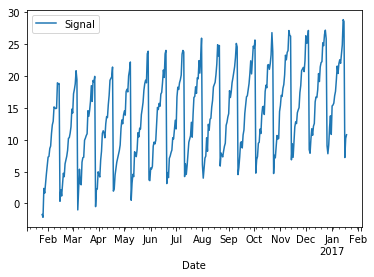

In [4]:
df_train.plot('Date' , ['Signal'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:START_TRAINING 'Signal'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Signal' 3.113215446472168
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: kwds={'days': 1.0}> Estimation = (0 , 282) Validation = (282 , 353) Test = (353 , 360) Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal' Min=-2.169403604051069 Max=28.806094768516086  Mean=13.860888319370588 StdDev=6.814449159639871
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal' Min=-2.169403604051069 Max=28.806094768516086  Mean=13.860888319370588 StdDev=6.814449159639871
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_LinearTrend_residue_zeroCycle_residue_AR(64)' [LinearTrend + NoCycle + AR(64)]
INFO:pyaf.std:TREND_DETAIL '_Signal_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_LinearTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DET

INFO:pyaf.std:START_PLOTTING
/home/antoine/dev/python/packages/pyaf/TS/Plots.py:31: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/antoine/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/anto

/home/antoine/dev/python/packages/pyaf/TS/Plots.py:107: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/antoine/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/antoine/.local/lib/python3.6/sit

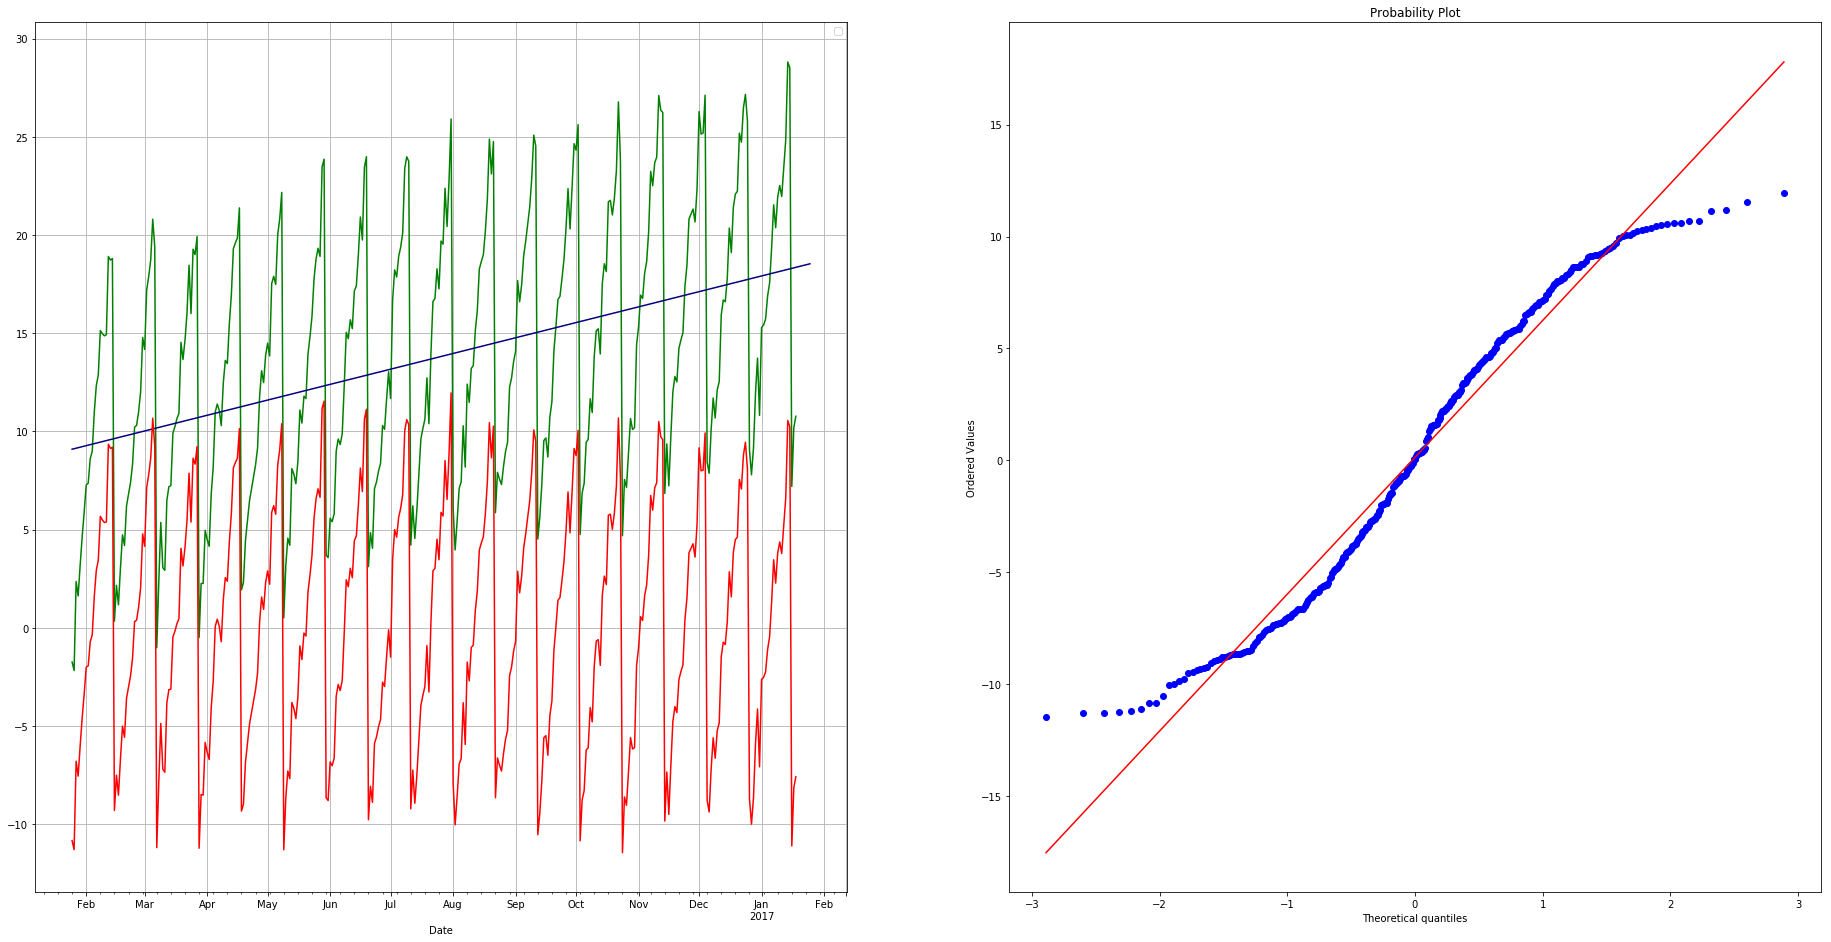

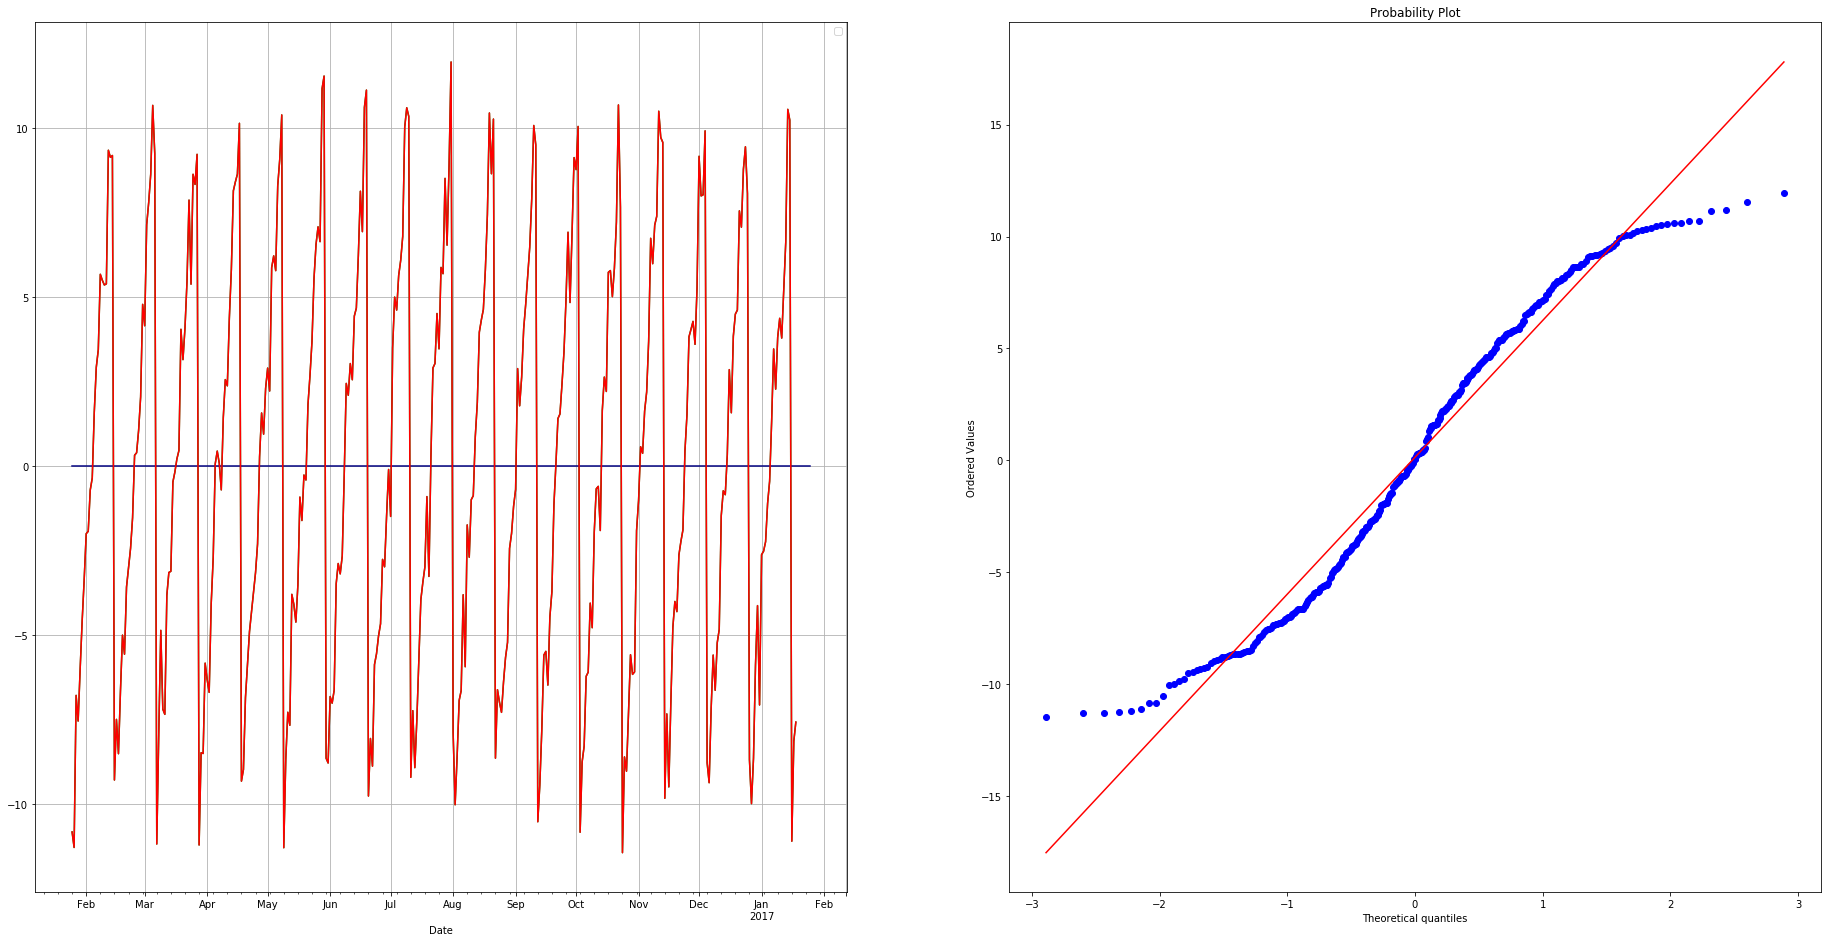

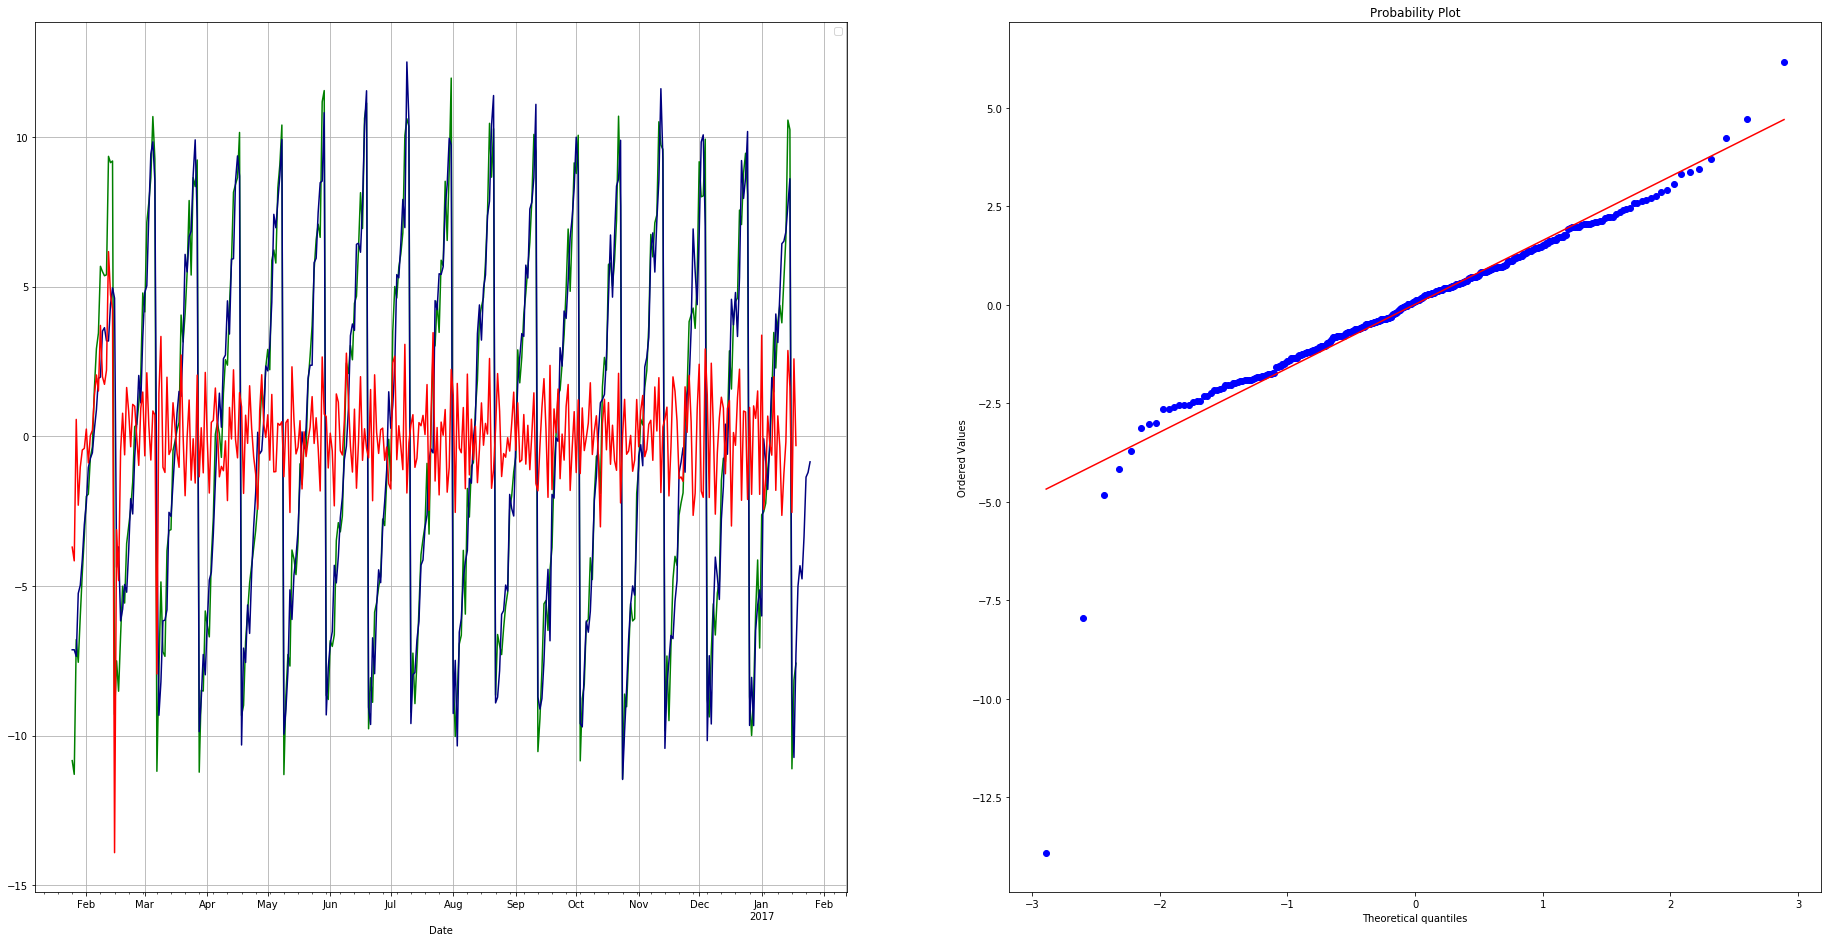

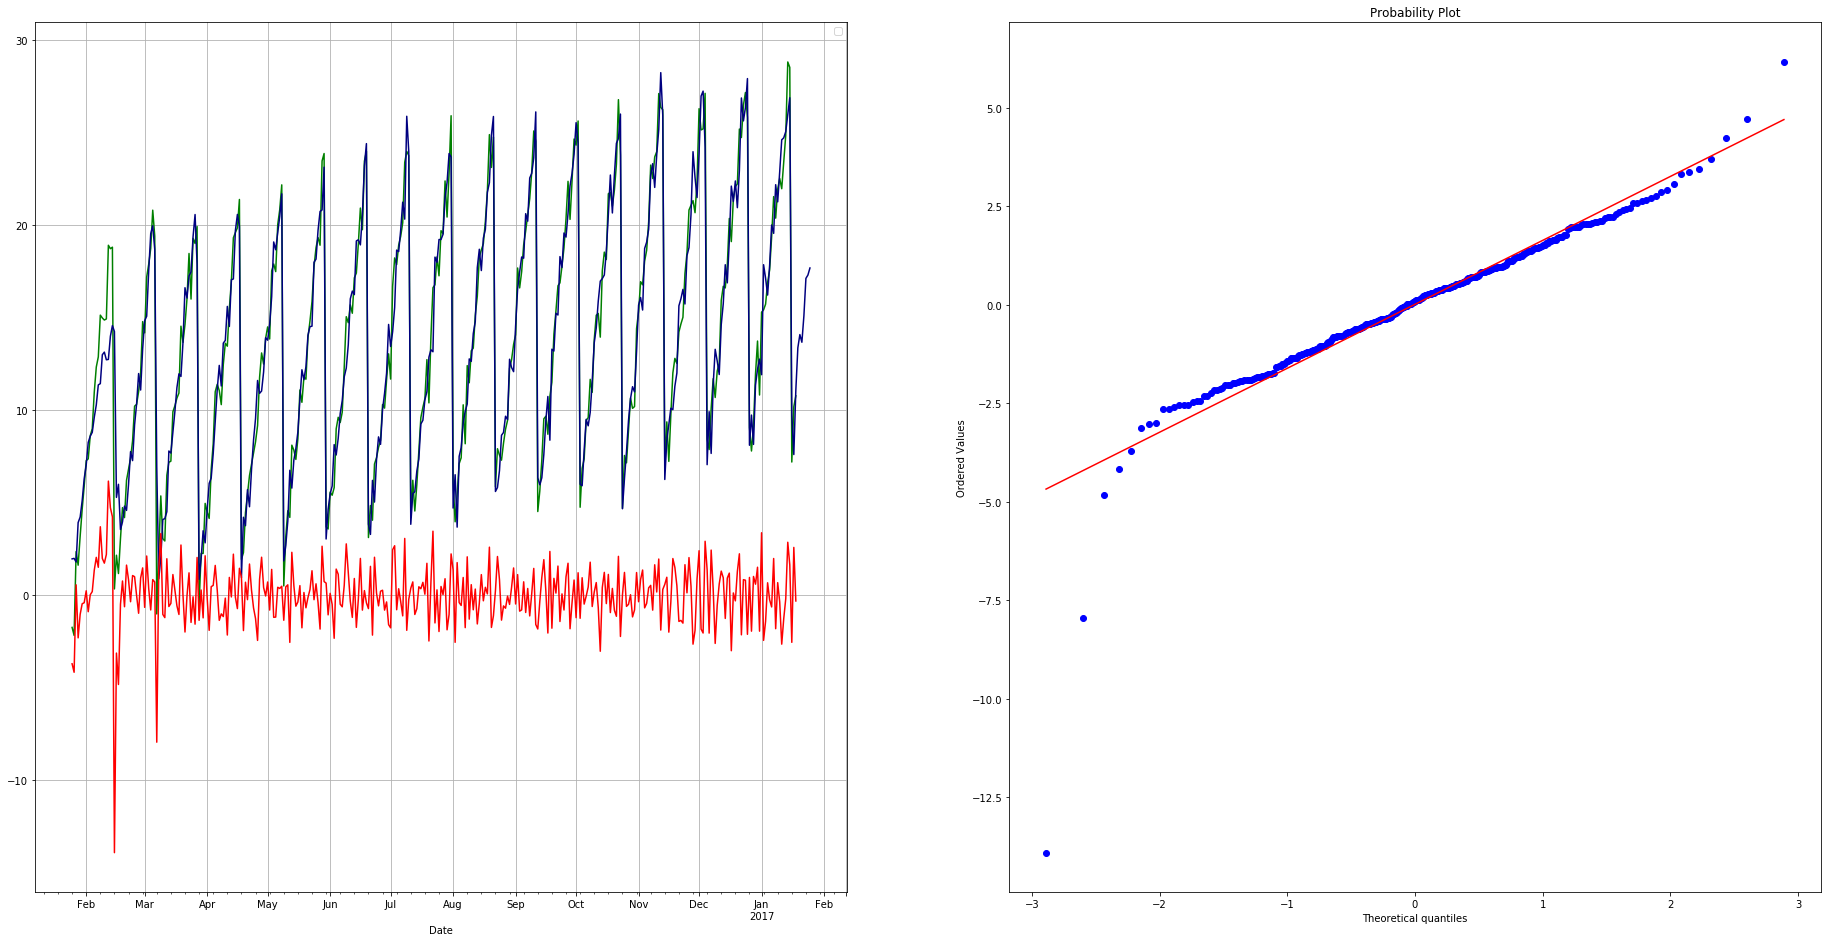

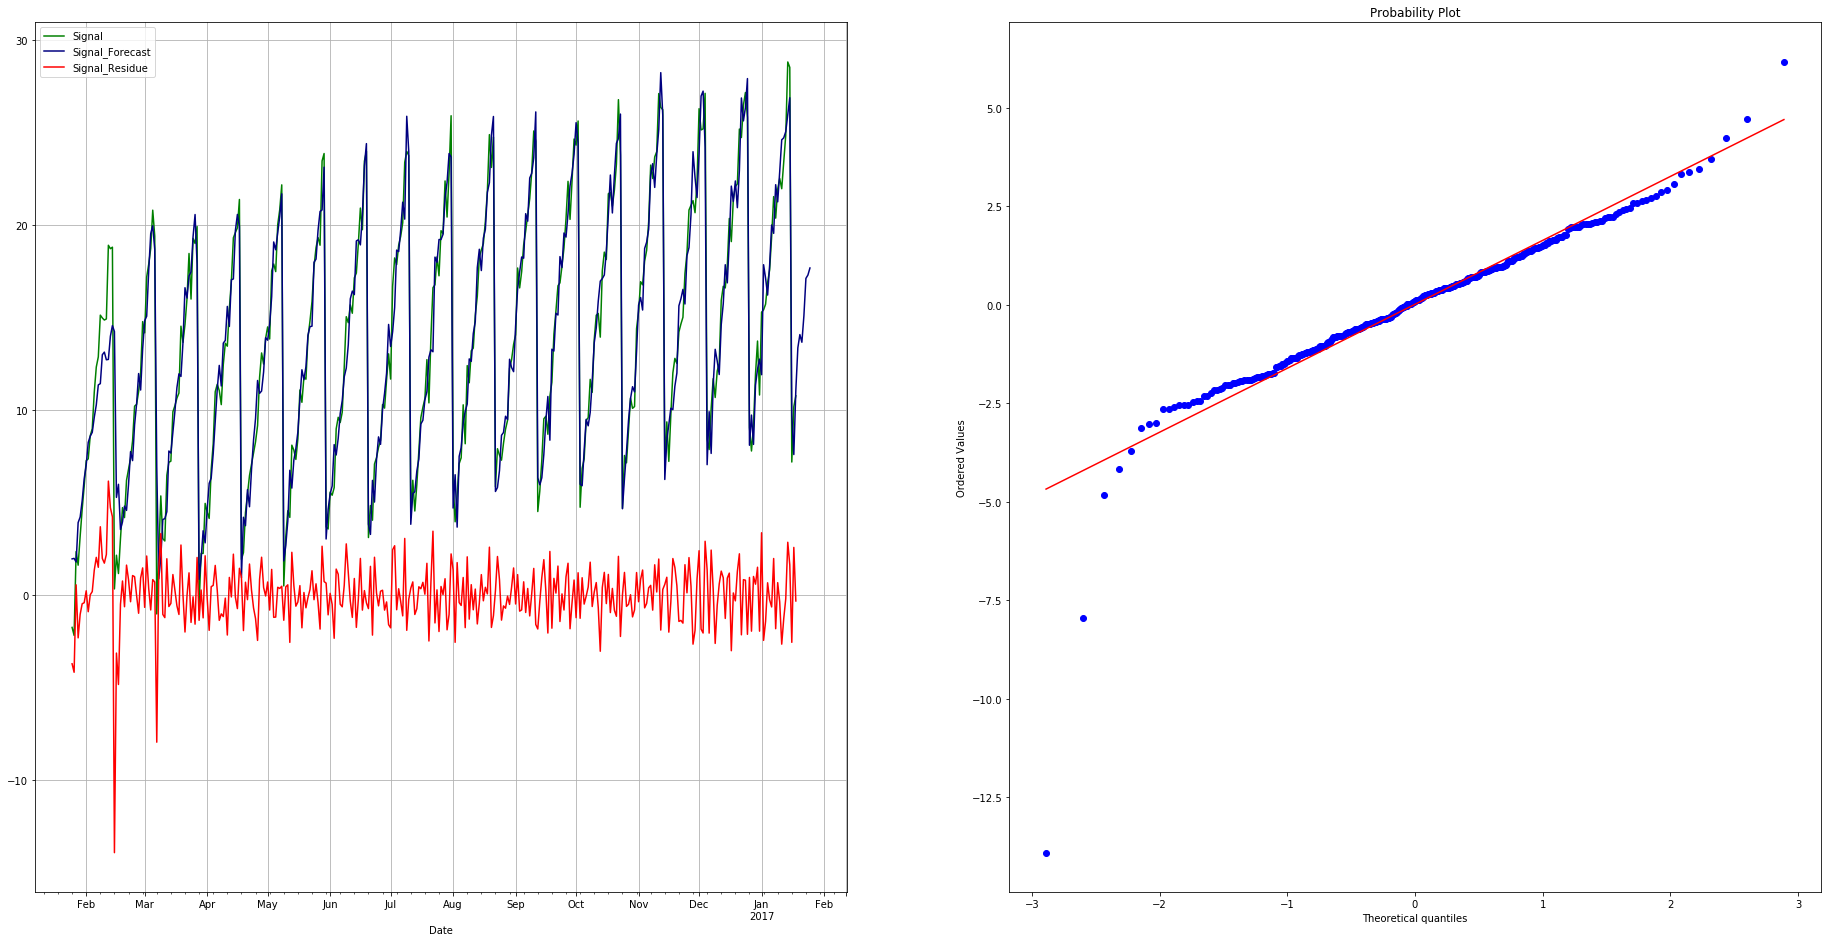

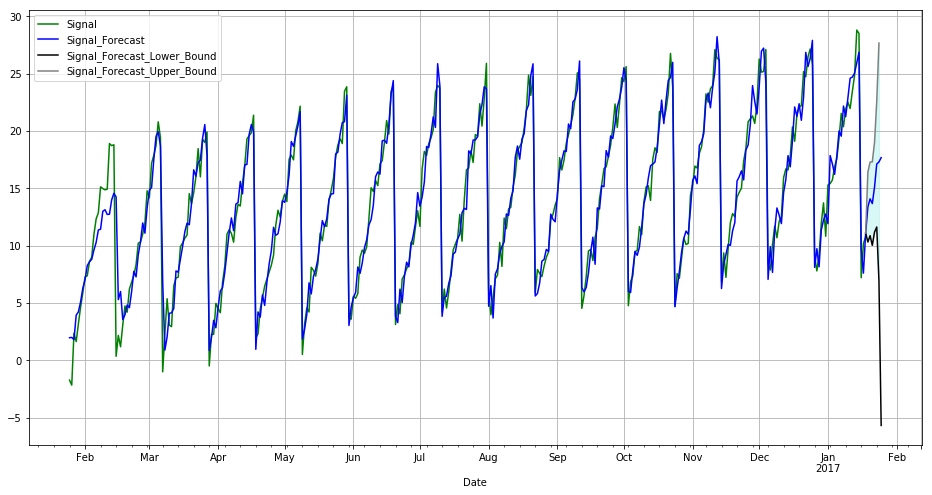

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.std:START_FORECASTING
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS 0.48406457901000977


Index(['Date', 'Signal', '_Signal', 'row_number', 'Date_Normalized',
       '_Signal_LinearTrend', '_Signal_LinearTrend_residue',
       '_Signal_LinearTrend_residue_zeroCycle',
       '_Signal_LinearTrend_residue_zeroCycle_residue',
       '_Signal_LinearTrend_residue_zeroCycle_residue_AR(64)',
       '_Signal_LinearTrend_residue_zeroCycle_residue_AR(64)_residue',
       '_Signal_Trend', '_Signal_Trend_residue', '_Signal_Cycle',
       '_Signal_Cycle_residue', '_Signal_AR', '_Signal_AR_residue',
       '_Signal_TransformedForecast', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound'],
      dtype='object')
['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000'
 '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000'
 '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000'
 '2017-01-25T00:00:00.000000000']
[13.36718249 14.08060016 13.66676016 15.09222582 17.11657277 17.2